In [3]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Read in data
data = pd.read_csv('./LimitedData.csv')
data.head()

,Unnamed: 0,user_id,order_id,product_id,product_name,department,aisle
0,347526,2335,576673,27104,Fresh Cauliflower,produce,fresh vegetables
1,347533,2335,576673,19057,Organic Large Extra Fancy Fuji Apple,produce,fresh fruits
2,347546,2335,576673,24852,Banana,produce,fresh fruits
3,347567,2335,2270991,27104,Fresh Cauliflower,produce,fresh vegetables
4,347570,2335,2270991,16797,Strawberries,produce,fresh fruits


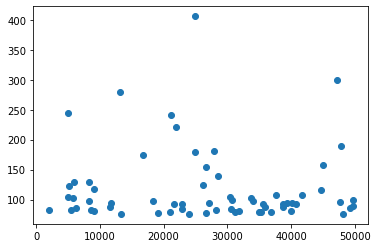

In [21]:
# Plot data by count of product_id by product
product_id_counts = data['product_id'].value_counts()
plot_df = pd.DataFrame({"Product Count": product_id_counts})

plt.scatter(plot_df.index, plot_df["Product Count"])

In [34]:
plot_df["Product Count"]

24852    406
47209    300
13176    280
4920     245
21137    241
        ... 
26620     78
19057     78
23909     76
13292     76
48109     76
Name: Product Count, Length: 65, dtype: int64

In [31]:
# Find number of departments (clusters)
data["department"].value_counts()

produce       4496
dairy eggs    1665
beverages      629
snacks         266
breakfast      242
deli           177
bakery         123
frozen         117
Name: department, dtype: int64

In [32]:
# Create a kmeans model using k = 8
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(plot_df)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(plot_df)

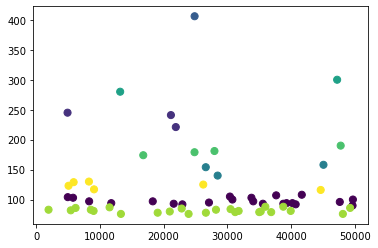

In [33]:
# Plot the clusters
plt.scatter(plot_df.index, plot_df['Product Count'], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [28]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [29]:
centers

array([[ 78.76923077],
       [300.        ],
       [178.        ],
       [128.        ],
       [243.        ],
       [406.        ],
       [ 95.13333333],
       [156.        ],
       [221.        ],
       [105.        ],
       [280.        ],
       [ 85.41666667],
       [118.66666667],
       [190.        ],
       [140.        ]])

IndexError: index 1 is out of bounds for axis 1 with size 1

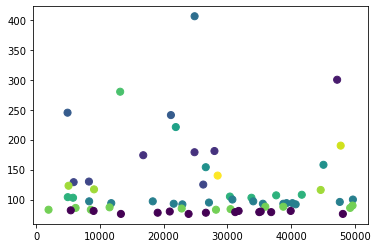

In [30]:
plt.scatter(plot_df.index, plot_df["Product Count"], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()